# Simple circuits 2024

In [1]:
# qiskit 1.0.0

## 1. Toffoli circuit

### Creating the circuit

In [2]:
from qiskit import *

In [3]:
# create 3 quantum registers, one for each qubit
q=QuantumRegister(3)
# create 3 corresponding classical registers (needed for storing measurement results)
c=ClassicalRegister(3)
# create a quantum circuit with these registers
toffoli = QuantumCircuit(q,c)
# NOT gates on q[1] and q[2]
toffoli.x(q[1])
toffoli.x(q[2])
# barrier to prevent gate reordering (not necessary, but makes visualization look nice) 
toffoli.barrier()
# double-controlled-NOT (Toffoli) gate; controls={q[2],q[1]};  target=q[0]
toffoli.ccx(q[2], q[1], q[0])
# cNOT (controlled-NOT) gate; control=q[2];  target=q[1]
toffoli.cx(q[2],q[1])
toffoli.barrier()
# measurement gates
toffoli.measure(q, c)

### Visualizing the circuit

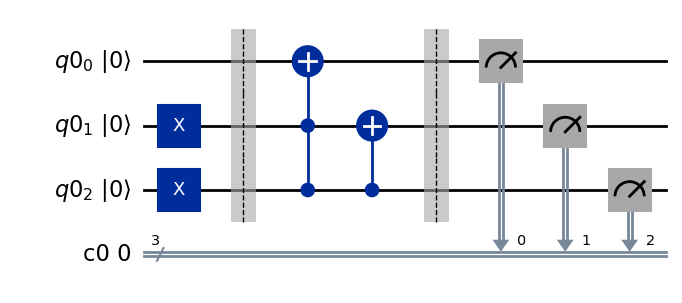

In [4]:
toffoli.draw(initial_state=True,output="mpl",style="iqp")

### Executing the circuit on the local qasm simulator

In [5]:
from qiskit_aer import Aer

simulator = Aer.get_backend('qasm_simulator')

In [28]:
# We've set the number of shots (repeats) of the circuit
# to be 1024, which is the default value
job_sim = simulator.run(toffoli,shots=1024)

In [29]:
# Grab the results from the job
result_sim = job_sim.result()

In [30]:
counts_sim = result_sim.get_counts(toffoli)
print(counts_sim)

{'101': 1024}


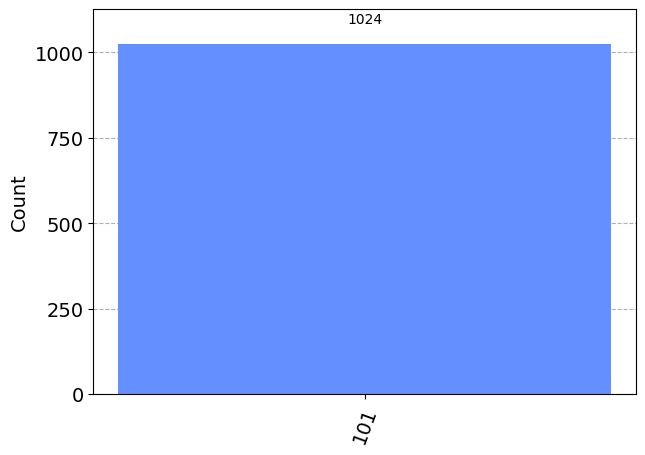

In [31]:
# Plot a histogram of the results
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim)

### Executing the circuit on a real device 

In [ ]:
# See 
# https://qiskit.org/documentation/partners/qiskit_ibm_provider/tutorials/Migration_Guide_from_qiskit-ibmq-provider.html

In [10]:
from qiskit_ibm_provider import IBMProvider, least_busy

In [23]:
# The FIRST time that you execute on an IBM backend, you must save your account number, as follows:
#IBMProvider.save_account(token="b345ed2b966fd3b3fd80a5e5dbf584e31c4d856ef9c4ee88216d1527b8283a96d8167e368f4316696e82b35ff92646e7d40016a32346228b25a5e54fb0eda5d8")

In [11]:
# Loads your personal account number, which you have previously saved
provider = IBMProvider()

In [12]:
# Available IBM devices that are NOT a simulator
provider.backends(simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>]

In [13]:
# We choose the least-busy IBM device that is NOT a simulator 
backend = least_busy(provider.backends(simulator=False, operational=True))

In [14]:
backend.name

'ibm_kyoto'

In [ ]:
#  Alternative:
# backend = provider.get_backend("ibm_osaka")

In [15]:
mapped_toffoli=transpile(toffoli,backend=backend)

In [16]:
# default number of shots is 4000
job_exp = backend.run(mapped_toffoli, shots=1024)

In [17]:
jobid = job_exp.job_id()
jobid

'cqft060372pg008xnbjg'

In [18]:
job_exp.status()

<JobStatus.QUEUED: 'job is queued'>

In [20]:
job_exp.status()

<JobStatus.QUEUED: 'job is queued'>

In [ ]:
# If there is an error
#job_exp.error_message()

In [ ]:
# Alternative:
# retrieved_job = backend.retrieve_job(jobid)
# result_exp = retrieved_job.result()

In [ ]:
result_exp = job_exp.result()

In [ ]:
counts_exp = result_exp.get_counts()
print(counts_exp)

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts_sim], legend=['Device', 'Simulator'])

## 1) Toffoli circuit PS3 answers
a) This circuit runs NOT gates on q1 and q2, a Toffoli gate on q0 using q1 and q2 as controls, and a control not on q1 with q2 as control, before measuring.
b) The results don't change. This is is because the probability that the state is 101 is ~100, and because we know what the initial states are and what operations we are running, we can infer what the result should be.
c)

## 2. Bell circuit

### Creating the circuit

In [ ]:
# from qiskit import *

In [21]:
q=QuantumRegister(2)
c=ClassicalRegister(2)
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])
bell.barrier()
bell.measure(q, c)

### Visualizing the circuit

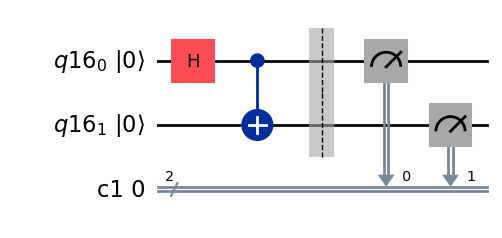

In [22]:
bell.draw("mpl", style="iqp", initial_state=True)

### Executing the circuit on the local qasm simulator

In [ ]:
# from qiskit import Aer
# simulator = Aer.get_backend('qasm_simulator')

In [26]:
job_sim = simulator.run(bell, shots=1024)
result_sim = job_sim.result()
counts_sim = result_sim.get_counts(bell)
print(counts_sim)

{'00': 528, '11': 496}


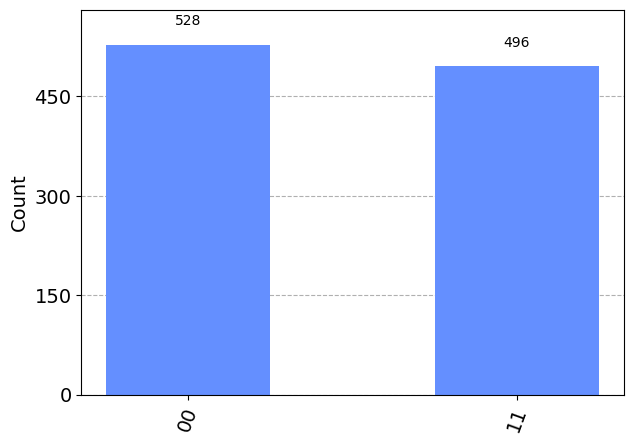

In [27]:
# from qiskit.visualization import plot_histogram
plot_histogram(counts_sim)

### Executing the circuit on a real device

In [ ]:
#from qiskit_ibm_provider import IBMProvider, least_busy
#provider = IBMProvider()
#backend = least_busy(provider.backends(simulator=False, operational=True))

In [32]:
backend.name

'ibm_kyoto'

In [33]:
mapped_bell=transpile(bell,backend=backend)

In [34]:
job_exp = backend.run(mapped_bell, shots=1024)

In [35]:
jobid = job_exp.job_id()
jobid

'cqfv5c5ktv0g008wb8kg'

In [36]:
job_exp.status()

<JobStatus.QUEUED: 'job is queued'>

In [ ]:
#job_exp.queue_position()

In [ ]:
job_exp.status()

In [ ]:
# job_exp.error_message()

In [ ]:
# Alternative:
# retrieved_job = backend.retrieve_job(jobid)
# result_exp = retrieved_job.result()

In [ ]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(mapped_bell)
print(counts_exp)

In [ ]:
plot_histogram([counts_exp,counts_sim], legend=['Device', 'Simulator'])

## 2) Toffoli circuit PS3 answers
a) This circuit runs the Bell circuit,  which  runs a haddemar on  q0, before running a cNOT on q1 with q0 as a control. The results of this computation are 522 00 results and 502 11 results.
b) After rerunning, the results change slightly, with 528 00 results and 496 11 results. This shows that the results should be similar on different runs of the simulator, with a near 50/50 chance of either 00 or 11 being the result in both cases.
c)

## 3. Dense coding circuits

#### The case 11

In [90]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense11 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense11.h(q[0])
dense11.cx(q[0], q[1])
dense11.barrier()
# To send the message 11, Alice applies first X and then Z to her qubit
dense11.x(q[0])
dense11.z(q[0])
dense11.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message
# Bob applies a cNOT and then H
dense11.cx(q[0], q[1])
dense11.h(q[0])
dense11.barrier()
# Bob then measures both qubits
dense11.measure(q, c)

### Visualizing the circuit

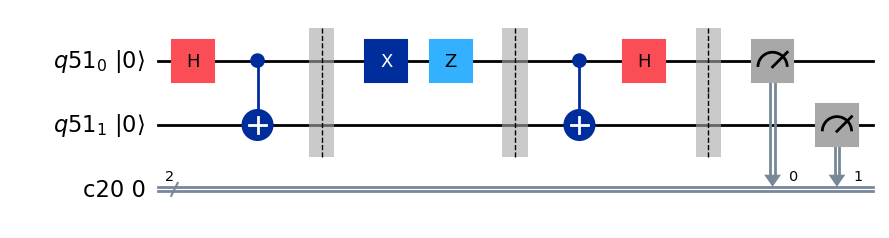

In [91]:
dense11.draw("mpl",style="iqp", initial_state=True)

### Executing the circuit on the local qasm simulator

{'11': 1024}


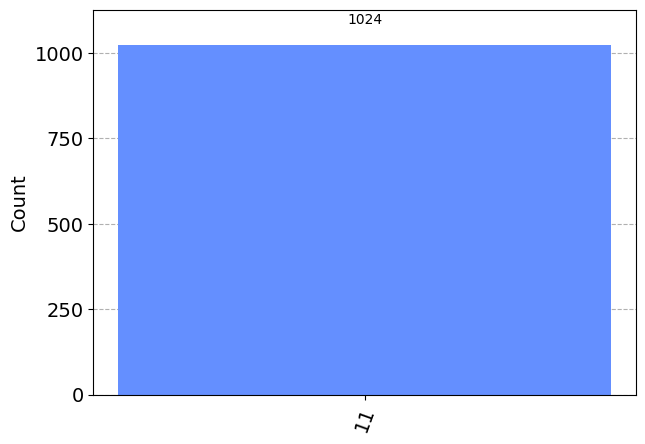

In [92]:
job_sim = simulator.run(dense11, shots=1024)
result_sim = job_sim.result()
counts_sim = result_sim.get_counts(dense11)
print(counts_sim)
plot_histogram(counts_sim)

#### The case 01

In [73]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense01 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense01.h(q[0])
dense01.cx(q[0], q[1])
dense01.barrier()
# To send the message 01, Alice applies Z to her qubit
dense01.z(q[0])
dense01.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message
# Bob applies a cNOT and then H
dense01.cx(q[0], q[1])
dense01.h(q[0])
dense01.barrier()
# Bob then measures both qubits
dense01.measure(q, c)

### Visualizing the circuit

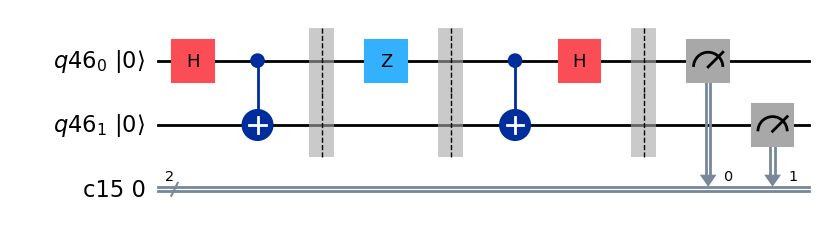

In [74]:
dense01.draw("mpl",style="iqp", initial_state=True)

### Executing the circuit on the local qasm simulator

{'01': 1024}


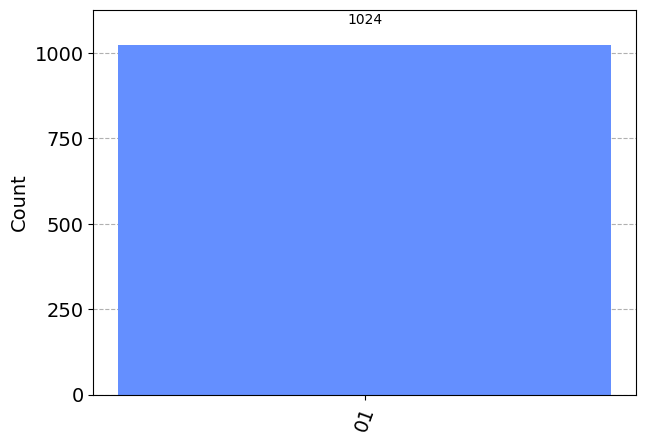

In [75]:
job_sim = simulator.run(dense01, shots=1024)
result_sim = job_sim.result()
counts_sim = result_sim.get_counts(dense01)
print(counts_sim)
plot_histogram(counts_sim)

#### The case 10

In [82]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense10 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense10.h(q[0])
dense10.cx(q[0], q[1])
dense10.barrier()
# To send the message 10, Alice applies X to her qubit
dense10.x(q[0])
dense10.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message
# Bob applies a cNOT and then H
dense10.cx(q[0], q[1])
dense10.h(q[0])
dense10.barrier()
# Bob then measures both qubits
dense10.measure(q, c)

### Visualizing the circuit

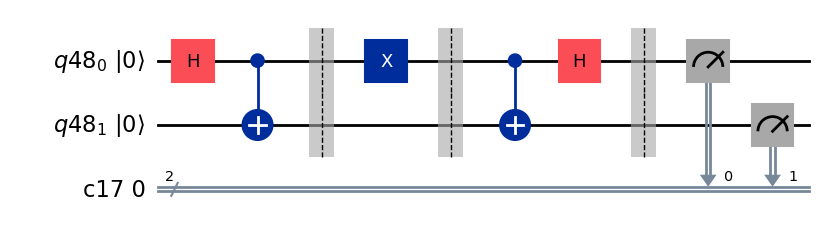

In [83]:
dense10.draw("mpl",style="iqp", initial_state=True)

### Executing the circuit on the local qasm simulator

{'10': 1024}


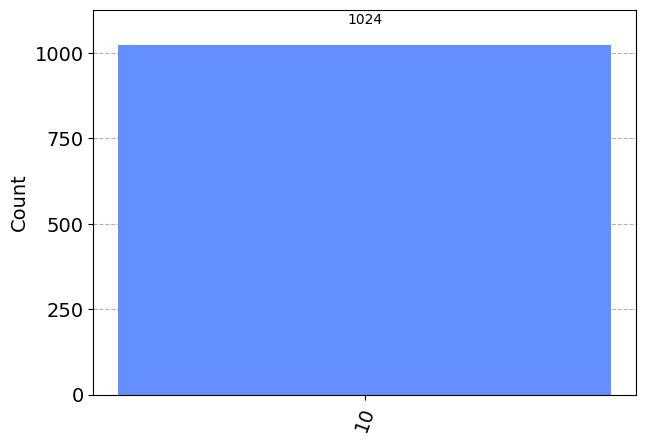

In [85]:
job_sim = simulator.run(dense10, shots=1024)
result_sim = job_sim.result()
counts_sim = result_sim.get_counts(dense10)
print(counts_sim)
plot_histogram(counts_sim)

#### The case 00

In [87]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense00 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense00.h(q[0])
dense00.cx(q[0], q[1])
dense00.barrier()
# To send the message 00, Alice applies Identity (nothing) to her qubit
dense00.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message
# Bob applies a cNOT and then H
dense00.cx(q[0], q[1])
dense00.h(q[0])
dense00.barrier()
# Bob then measures both qubits
dense00.measure(q, c)

### Visualizing the circuit

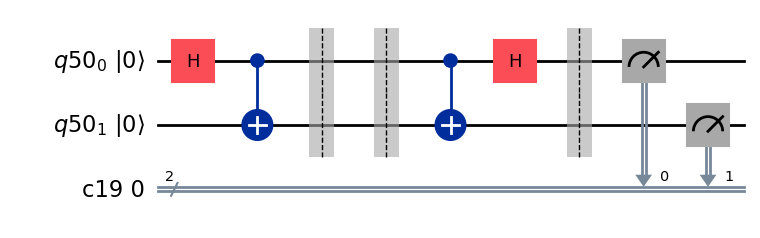

In [88]:
dense00.draw("mpl",style="iqp", initial_state=True)

### Executing the circuit on the local qasm simulator

{'00': 1024}


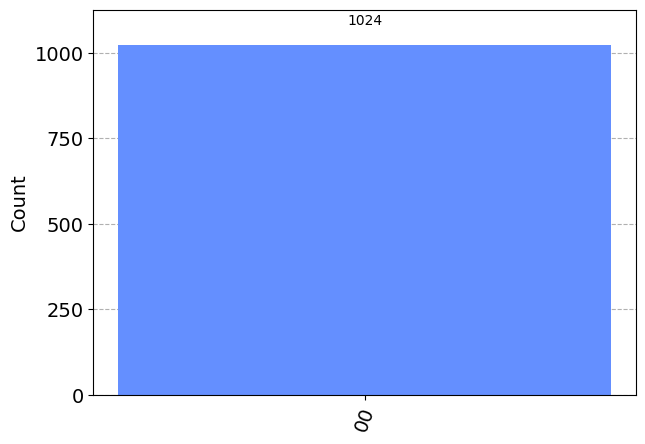

In [89]:
job_sim = simulator.run(dense00, shots=1024)
result_sim = job_sim.result()
counts_sim = result_sim.get_counts(dense00)
print(counts_sim)
plot_histogram(counts_sim)

### Executing the circuit on a real device

In [94]:
backend.name
mapped_dense11 = transpile(dense11,backend=backend)
job_exp = backend.run(mapped_dense11, shots=1024)
jobid = job_exp.job_id()
jobid
job_exp.status()

<JobStatus.QUEUED: 'job is queued'>

In [ ]:
result_exp = job_exp.result()
cunts_exp = result_exp.get_counts()
print(counts_exp)

## 3)
a) Yes it gives the expected result, because Alice sent '11' to Bob and we measured '11' as our result.
b) Yes, we get the expected results for all the other three cases ('01', '10', '00')
c) 

## 4. Teleportation

### Creating the circuit

In [ ]:
# from qiskit import *

In [95]:
# We need 3 qubits: one qubit for the "unknown" state to be teleported, and two qubits for the entangled pair
q = QuantumRegister(3)
# corresponding classical registers
c0 = ClassicalRegister(1)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
teleport = QuantumCircuit(q,c0,c1,c2)

In [96]:
# We create Alice's "unknown" state that she wants to teleport to Bob
# As an example, we take the "unknown" state to be a rotation about the y-axis by angle pi/4 of |0>
# ry() is a 1-qubit gate that performs the rotation
# We call NumPy with "np" to evaluate pi/4
import numpy as np
teleport.ry(np.pi/4,q[0])
teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q72'), 0), Qubit(QuantumRegister(3, 'q72'), 1), Qubit(QuantumRegister(3, 'q72'), 2)), clbits=())

In [97]:
# We create an entangled pair of qubits; Alice has one, and Bob has the other one
teleport.h(q[1])
teleport.cx(q[1], q[2])
teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q72'), 0), Qubit(QuantumRegister(3, 'q72'), 1), Qubit(QuantumRegister(3, 'q72'), 2)), clbits=())

In [98]:
# We now implement the teleportation protocol:
# Alice applies a cNOT to her two qubits, with the control on the qubit in the "unknown" state
teleport.cx(q[0], q[1])
# Alice then applies a Hadamard to the qubit in the "unknown" state
teleport.h(q[0])
teleport.barrier()
# Alice measures both of her qubits
teleport.measure(q[0], c0)
teleport.measure(q[1], c1)
# Depending on the results of Alice's measurements, Bob applies an X or Z, or both, to his qubit
teleport.x(q[2]).c_if(c1, 1)
teleport.z(q[2]).c_if(c0, 1)
# Bob's qubit should now be in the same "unknown" state, which can be verified by measurement:
teleport.measure(q[2], c2)

### Visualizing the circuit

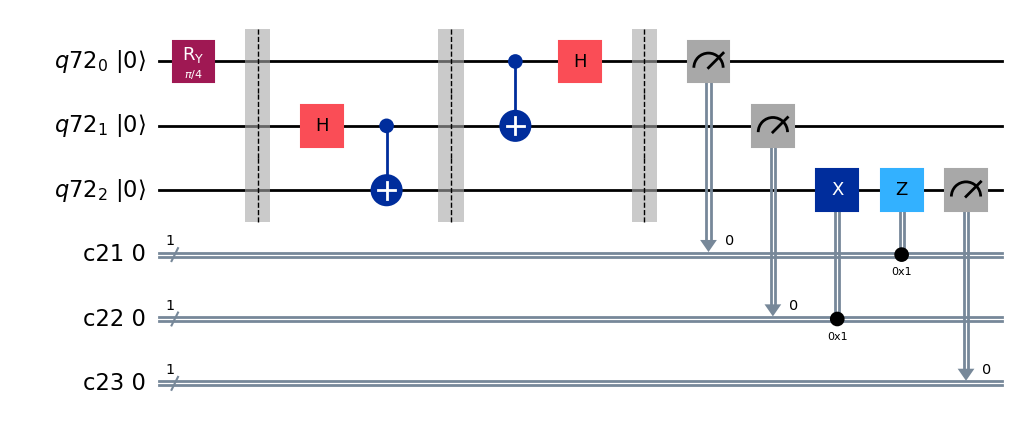

In [99]:
teleport.draw("mpl",style="iqp", initial_state=True)

### Executing the circuit on the local qasm simulator

In [100]:
teleport_job = simulator.run(teleport, shots=1024)
teleport_result = teleport_job.result()
data = teleport_result.get_counts(teleport)
# Results of measurements of all 3 qubits
print(data)

{'1 0 0': 44, '1 1 0': 45, '1 1 1': 35, '0 1 1': 217, '0 0 1': 214, '1 0 1': 43, '0 0 0': 203, '0 1 0': 223}


In [101]:
# The results of Bob's measurements (c2) are contained in the LEFTmost classical register
# We must sum over all the possible results of Alice's measurements 
# (contained in the middle and rightmost classical registers) to obtain the totals
bob = {}
bob['0'] = data['0 0 0'] + data['0 0 1'] + data['0 1 0'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 0 1'] + data['1 1 0'] + data['1 1 1']

In [102]:
print(bob)

{'0': 857, '1': 167}


In [103]:
bob['0'] + bob['1'] 

1024

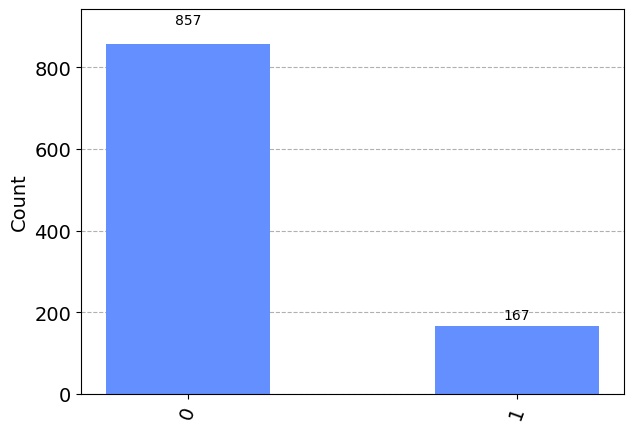

In [104]:
plot_histogram(bob)

## 4)
a) My result from Mathematica was {0.853553, 0.146447} to measure 0 and 1.
b) First we apply a rotation to create an arbitrary 'psi' unknown qubit on q0. Then we entangle q1 and q2, with Alice having q0 and q1. Alice applies a cNOT with q0 as the control and q1 as the target, and applies a Hadamard on q0. This the teleportation protocol, which outputs values that Bob can use to turn his q2 into what q0 used to be upon measurement. So Alice measures q0 and q1 into c0 and c1 respectively, and Bob applies X to q2 if c1 is 1, and Z to q2 if c0 is 1. Bob's q2 gate should have the teleported q0 qubit. Bob then measures q2 into c2, which should have the estimated value of q2.
c) My results produce {0.836914,0.163086}, which is close to the reported expected values from computing the probabilities by hand.